<a href="https://colab.research.google.com/github/PaulToronto/Stanford-Andrew-Ng-Machine-Learning-Specialization/blob/main/1_3_2_Cost_function_for_logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.3.2 Cost function for logistic regression

## Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1.3.2.1 Cost function for logistic regression

The **squared error cost function** is not an ideal cost function for logistic regression.

### Training set

<img src='https://drive.google.com/uc?export=view&id=1kjucBtP0gmFqsiYXsI1t170BQnBs_c9A'>

Given this training set, how do you choose parameters:

$\vec{w} = \left[w_1 w_2 \cdots w_n\right]$ and $b$?



### Recall the squared error cost function

- Note the $frac{1}{2}$ is inside the sum this time

$$
J(\vec{w},b) = \frac{1}{m}\sum_{i=1}^{m}\frac{1}{2}\left(f_{\vec{w},b}\left(\vec{x}^{(i)}\right) - y^{(i)}\right)^{2}
$$

For linear regression

$$
f_{\vec{w},b} = \vec{w} \cdot \vec{x} + b
$$

and the cost function is convex:

<img src='https://drive.google.com/uc?export=view&id=1XDgJsCZiCk_DDT9BFVNyF2najsjNF1Vh'>

For logistic regression

$$
f_{\vec{w},b} = \frac{1}{1 + e^{-\left(\vec{w} \cdot \vec{x} + b\right)}}
$$

and the cost function is **non-convex**:

<img src='https://drive.google.com/uc?export=view&id=1y1NegO-4kc9pk1NOm_MjydbKZwSU1hqN'>

In this case, gradient descent is very likely to get stuck in a local minimum.



### Changing the cost function

Squared error cost function:

$$
J(\vec{w},b) = \frac{1}{m}\sum_{i=1}^{m}\frac{1}{2}\left(f_{\vec{w},b}\left(\vec{x}^{(i)}\right) - y^{(i)}\right)^{2}
$$

The loss function $L$, is defined by (note the $\frac{1}{2}$ is there to make the math easier):

$$
L\left(f_{\vec{w},b}\left(\vec{x}^{(i)}\right), y^{(i)}\right) = \frac{1}{2}\left(f_{\vec{w},b}\left(\vec{x}^{(i)}\right) - y^{(i)}\right)^{2}
$$

But this doesn't work because it is non-convex, so we change it:

$$
L\left(f_{\vec{w},b}\left(\vec{x}^{(i)}\right), y^{(i)}\right) = \begin{cases}
-\log{\left(f_{\vec{w},b}\left(\vec{x}^{(i)}\right)\right)} & y^{(i)} = 1 \\
-\log{\left(1 - f_{\vec{w},b}\left(\vec{x}^{(i)}\right)\right)} & y^{(i)} = 0
\end{cases}
$$

<ipython-input-2-33918c23229e>:9: RuntimeWarning: invalid value encountered in log
  plt.plot(f, -np.log(1 - f), c='navy', label='$-\log{(1 - f)}$')


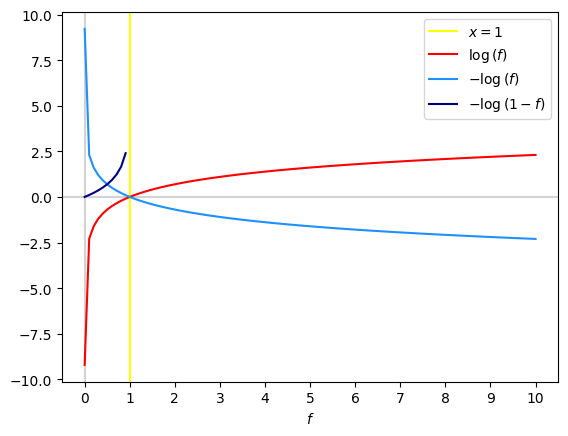

In [2]:
f = np.linspace(0.0001, 10, 100)

plt.axhline(0, c='lightgray')
plt.axvline(0, c='lightgray')
plt.axvline(1, c='yellow', label='$x = 1$')

plt.plot(f, np.log(f), c='red', label='$\log{(f)}$')
plt.plot(f, -np.log(f), c='dodgerblue', label='$-\log{(f)}$')
plt.plot(f, -np.log(1 - f), c='navy', label='$-\log{(1 - f)}$')
plt.xlabel('$f$')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.xlabel('$f$')

plt.legend()
plt.show()

But the output of the logistic regression is always between 0 and 1, so the only relevant part of the function is the part where $f < 1$ (the yellow vertical line)

Loss is lowest when $f_{\vec{w},b}\left(\vec{x}^{(i)}\right)$ predicts close to the true label $y^{(i)}$.

#### Suppose $y^{(i)} = 1$

As $f_{\vec{w},b}\left(\vec{x}^{(i)}\right) \rightarrow 1$ then $\text{loss } \rightarrow 0$

As $f_{\vec{w},b}\left(\vec{x}^{(i)}\right) \rightarrow 0$ then $\text{loss } \rightarrow \infty$

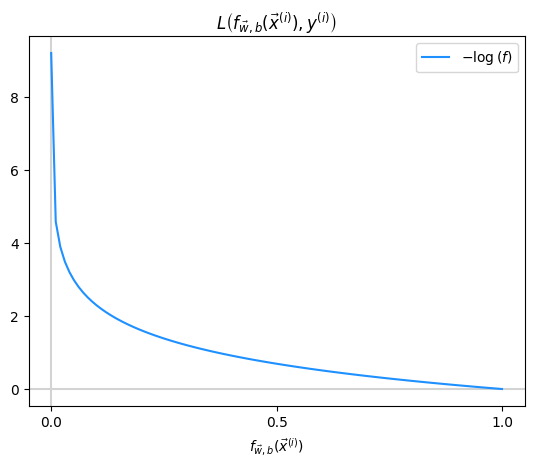

In [3]:
f = np.linspace(0.0001, 1, 100)

plt.axhline(0, c='lightgray')
plt.axvline(0, c='lightgray')

plt.plot(f, -np.log(f), c='dodgerblue', label='$-\log{(f)}$')
plt.xlabel('$f$')
plt.xticks([0, 0.5, 1])
plt.xlabel(r'$f_{\vec{w},b}\left(\vec{x}^{(i)}\right)$')
plt.title(r'$L\left(f_{\vec{w},b}\left(\vec{x}^{(i)}\right), y^{(i)}\right)$')

plt.legend()
plt.show()

#### Suppose $y^{(i)} = 0$

As $f_{\vec{w},b}\left(\vec{x}^{(i)}\right) \rightarrow 0$ then $\text{loss } \rightarrow 0$

As $f_{\vec{w},b}\left(\vec{x}^{(i)}\right) \rightarrow 1$ then $\text{loss } \rightarrow \infty$

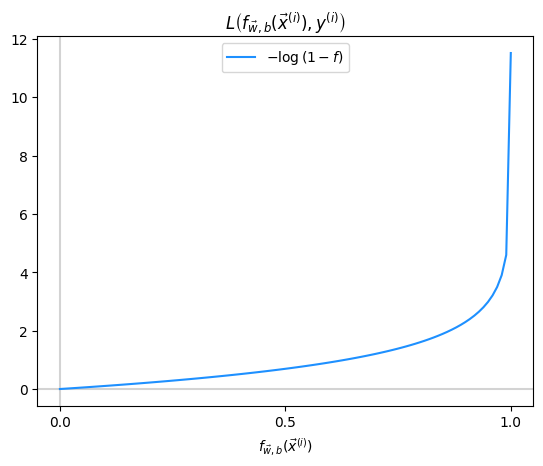

In [4]:
f = np.linspace(0, 0.99999, 100)

plt.axhline(0, c='lightgray')
plt.axvline(0, c='lightgray')

plt.plot(f, -np.log(1 - f), c='dodgerblue', label='$-\log{(1 - f)}$')
plt.xlabel('$f$')
plt.xticks([0, 0.5, 1])
plt.xlabel(r'$f_{\vec{w},b}\left(\vec{x}^{(i)}\right)$')
plt.title(r'$L\left(f_{\vec{w},b}\left(\vec{x}^{(i)}\right), y^{(i)}\right)$')

plt.legend()
plt.show()

### Logistic Regression Loss Function: Summary

This piecewise cost function is convex, therefore it is possible to use gradient descent to mimimize the cost. Recall that the cost fuction is a function of the entire training set, so dividing by $m$ makes it an average cost.

$$
J\left(\vec{w},b\right) = \frac{1}{m}\sum_{i=1}^{m}L\left(f_{\vec{w},b}\left(\vec{x}^{(i)}\right), y^{(i)}\right)
$$

$$
L\left(f_{\vec{w},b}\left(\vec{x}^{(i)}\right), y^{(i)}\right) = \begin{cases}
-\log{\left(f_{\vec{w},b}\left(\vec{x}^{(i)}\right)\right)} & y^{(i)} = 1 \\
-\log{\left(1 - f_{\vec{w},b}\left(\vec{x}^{(i)}\right)\right)} & y^{(i)} = 0
\end{cases}
$$

## 1.3.2.2 Lab - Logistic loss

https://colab.research.google.com/drive/1M56qhy1z4aP_TGpq40skqd07uqe86r7m

## 1.3.2.3 Simplified Cost Function for Logistic Regression

Because $y^{(i)}$ can only be $0$ or $1$, there is a simpler way to write out the loss function:

$$
L\left(f_{\vec{w},b}\left(\vec{x}^{(i)}\right), y^{(i)}\right) = -y^{(i)}\log{\left(f_{\vec{w},b}\left(\vec{x}^{(i)}\right)\right)} - \left(1 - y^{(i)}\right)\log{\left(1 - f_{\vec{w},b}\left(\vec{x}^{(i)}\right)\right)}
$$

So the cost function can be written like this:

$$
\begin{align}
J\left(\vec{w},b\right) &= \frac{1}{m}\sum_{i=1}^{m}\left(L\left(f_{\vec{w},b}\left(\vec{x}^{(i)}\right), y^{(i)}\right)\right) \\
&= \frac{1}{m}\sum_{i=1}^{m}\left(-y^{(i)}\log{\left(f_{\vec{w},b}\left(\vec{x}^{(i)}\right)\right)} - \left(1 - y^{(i)}\right)\log{\left(1 - f_{\vec{w},b}\left(\vec{x}^{(i)}\right)\right)}\right) \\
&= -\frac{1}{m}\sum_{i=1}^{m}\left(y^{(i)}\log{\left(f_{\vec{w},b}\left(\vec{x}^{(i)}\right)\right)} + \left(1 - y^{(i)}\right)\log{\left(1 - f_{\vec{w},b}\left(\vec{x}^{(i)}\right)\right)}\right)
\end{align}
$$

### Why this particular cost function?

- We could have chosen many other cost functions for logistic regression.
- This particular cost function was derived using a statistical principle called **maximum likelihood estimation**
    - An idea from statistics on how to efficiently find parameters for different models
- This cost function has the nice property that it is **convex**

## 1.3.2.4 Lab - Cost function for logistic regression

https://colab.research.google.com/drive/1k3dL5bgNNOLFN9VloebCnSE5BwGNPe8r